# Load Data - Select picked Z
pick_Z_Tr1 = 7940
pick_Z_Tr2 = 11388
pick_notZ_ = 0?

In [18]:
from obspy import read
import os
# data_st.write(file, format="SAC")

Tr1_pd = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z"
Tr2_pd = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z"

Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_1"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_2"

Tr2_f = os.listdir(Tr2)
Tr2_f.sort()
pick_tot = 0
# pick_Z = 0
for it0 in Tr2_f: # it0 tipical = "211205015137"
    for it1 in os.scandir(f"{Tr2}/{it0}"):         # it1 typical = /home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_2/211214033749/S0101.CHZ.sac
        if it1.path[-5] == "Z":
            b = read(it1.path)
            if "a" in b[0].stats.sac:
                # b.write(f"{Tr1_pd}/{it1.path.split('/')[-2]}.{it1.path.split('/')[-1]}",format="SAC")
                pick_tot += 1
            #print(it1.path)


# Create custom Dataset

In [1]:
from obspy import read
import os
import pandas as pd
import numpy as np
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/catalog_with_ID_abs_locations.txt")

Xcorso = "/home/silvia/Desktop/Data/DETECT/Tr_2_picked_Z"
Tr_l = os.listdir(Xcorso)
Tr_l.sort()
trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []

x2 = np.zeros((len(Tr_l),800))
for i,name in enumerate(Tr_l):
    b = read(f"{Xcorso}/{name}")
    meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

    trace_name.append(name[:-4])

    source_latitude_deg.append(meta_tr["LAT"].iloc[0])
    source_longitude_deg.append(meta_tr["LON"].iloc[0])
    source_depth.append(meta_tr["DEP"].iloc[0])
    source_origin_time.append(meta_tr["TIME"].iloc[0])

    station_code.append(b[0].stats.station)
    station_channels.append(b[0].stats.channel)
    trace_start_time.append(b[0].stats.starttime)
    trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

    source_magnitude.append(meta_tr["ML"].iloc[0])
    
    source_magnitude_type.append("ML")
    sampling_rate.append(b[0].stats.sampling_rate)
    x2[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio2 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
          "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
          "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio2["centrato"] = [True for i in range(len(x2))]
dizio2["demeaned"] = [False for i in range(len(x2))]
dizio2["normalized"] = [False for i in range(len(x2))]

In [2]:
from obspy import read
import os
import pandas as pd
import numpy as np
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/catalog_with_ID_abs_locations.txt")

Xcorso = "/home/silvia/Desktop/Data/DETECT/Tr_1_picked_Z"
Tr_l = os.listdir(Xcorso)
Tr_l.sort()
trace_name = []
source_latitude_deg = []
source_longitude_deg = []
source_depth = []
source_origin_time = []
station_code = []
station_channels = []
trace_start_time = []
trace_P_arrival_sample = []
source_magnitude = []
source_magnitude_type = []
sampling_rate = []

x1 = np.zeros((len(Tr_l),800))
for i,name in enumerate(Tr_l):
    b = read(f"{Xcorso}/{name}")
    meta_tr = meta[meta["ID"] == int(name.split(".")[0])]

    trace_name.append(name[:-4])

    source_latitude_deg.append(meta_tr["LAT"].iloc[0])
    source_longitude_deg.append(meta_tr["LON"].iloc[0])
    source_depth.append(meta_tr["DEP"].iloc[0])
    source_origin_time.append(meta_tr["TIME"].iloc[0])

    station_code.append(b[0].stats.station)
    station_channels.append(b[0].stats.channel)
    trace_start_time.append(b[0].stats.starttime)
    trace_P_arrival_sample.append(int(b[0].stats.sac.a * b[0].stats.sampling_rate))

    source_magnitude.append(meta_tr["ML"].iloc[0])
    
    source_magnitude_type.append("ML")
    sampling_rate.append(b[0].stats.sampling_rate)
    x1[i] = b[0].data[trace_P_arrival_sample[-1]-400: trace_P_arrival_sample[-1]+400]


dizio1 = {"trace_name":trace_name,"source_latitude_deg": source_latitude_deg, "source_longitude_deg":source_longitude_deg, "source_depth":source_depth,
          "source_origin_time":source_origin_time,"station_code":station_code, "station_channels": station_channels, "trace_start_time": trace_start_time,
          "trace_P_arrival_sample":trace_P_arrival_sample, "source_magnitude":source_magnitude,"source_magnitude_type":source_magnitude_type,"sampling_rate":sampling_rate}
dizio1["centrato"] = [True for i in range(len(x1))]
dizio1["demeaned"] = [False for i in range(len(x1))]
dizio1["normalized"] = [False for i in range(len(x1))]

In [3]:
dizio_tot = {}
for key in dizio1:
    dizio_tot[key] = dizio1[key]+dizio2[key]
xtot = np.concatenate((x1, x2), axis = 0) 

In [4]:
from Classe_sismogramma_v3 import ClasseDataset
D = ClasseDataset()
D.sismogramma = xtot
D.metadata = dizio_tot
hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked2.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked2.csv"
D.centrato = True
D.crea_custom_dataset(hd,cs) #######################ATTENTO A SOURCE ID te lo perdi!"

sto creando hdf5
ho creato hdf5


 PANDAS HA AGITO 0.38449266600036935


In [1]:
from Classe_sismogramma_v3 import ClasseDataset
D = ClasseDataset()

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"

D.leggi_custom_dataset(hd,cs)

# Ricava eventi picked - Plot delle stesse

In [1]:
# Ricavo eventi picked
import matplotlib.pyplot as plt
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd

D = ClasseDataset()
hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"
D.leggi_custom_dataset(hd,cs)

a = pd.DataFrame.from_dict(D.metadata)

list_source = []
list_lat = []
list_lon = []
list_dep = []
list_mag = []
list_num_P_picked = []

for i in a.source_id:
    if not(i in list_source):
        list_source.append(i)

for k in list_source: 
    aa = a[a["source_id"]==k]
    list_lat.append(aa["source_latitude_deg"].iloc[0])    
    list_lon.append(aa["source_longitude_deg"].iloc[0])    
    list_dep.append(aa["source_depth"].iloc[0])
    list_mag.append(aa["source_magnitude"].iloc[0])
    list_num_P_picked.append(len(aa))

map_events_picked = pd.DataFrame.from_dict({"source_id": list_source,"source_latitude_deg":list_lat, "source_longitude_deg": list_lon, "source_depth": list_dep, 
                                     "source_magnitude":list_mag, "number_P_picks": list_num_P_picked})
#map_events_picked.to_csv("/home/silvia/Desktop/Data/DETECT/Map_events_Picks.csv", index=False)


In [1]:
# plot picked in base a magnitudo e num. pick
import pandas as pd
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
import math

map_events_picked = pd.read_csv("/home/silvia/Desktop/Data/DETECT/Map_events_Picks.csv")
colorscale_custom = [
    [0.0, 'red'],           # a 0 rossi
    [0.042, 'red'],         # tra 1 e 6 rossi
    [0.069, 'blue'],        # Valori tra 7 e 10 saranno rosso-blu
    [0.14, 'green'],        # Valori tra 10 e 20 saranno blu-verdi
    [1.0, 'green'],         # Valori superiori a 20 saranno verdi
]

sizes = []
for i in map_events_picked["source_magnitude"]:
    if not math.isnan(i):
        sizes.append(i*2.0+4.5)
    else:
        sizes.append(1.5)

df = map_events_picked[["source_latitude_deg","source_longitude_deg", "source_depth"]]


# Create an interactive 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['source_latitude_deg'],
    y=df['source_longitude_deg'],
    z=df['source_depth'],
    mode='markers',
    marker=dict(
        size=sizes,
        opacity=0.7,
        color=map_events_picked["number_P_picks"],
        colorscale=colorscale_custom,  # Usa la colormap personalizzata
        colorbar=dict(title='Color Scale', tickvals=[7, 10, 20], ticktext=['7<: Red','10 Blue', '>20: green']),  # Aggiungi la colorbar personalizzata
    ),
    name='Picked'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Latitude',
        yaxis_title='Longitude',
        zaxis_title='Depth'
    ),
    title='Mappa eventi in base a numero di tracce con pick'
)

# Save the plot to an HTML file
fig.write_html("/home/silvia/Desktop/Plot_qualcosa.html")

<AxesSubplot:>

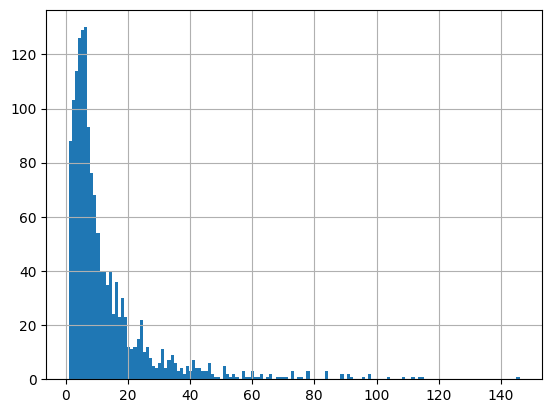

In [3]:
map_events_picked["number_P_picks"].hist(bins=146)

# Verify events in catalogue are in T1 or T2 folders

In [1]:
# Ho trovato 19.328 pick dalle tracce e 22.000 dal catalogo. catalogo ha più eventi, se considero quelli
# comuni ho 19.330 pick (ok)
import os
import pandas as pd
meta = pd.read_csv("/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/catalog_with_ID_abs_locations.txt")
Tr1 = "/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_1"
Tr2 = "/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/Traces_2"
Tr1_f = os.listdir(Tr1)
Tr2_f = os.listdir(Tr2)
len(Tr1_f)+ len(Tr2_f)

ID_list = list(meta["ID"])
T_tot = Tr1_f + Tr2_f

for ti in T_tot:
    if int(ti) in ID_list:
        4                       # verifico se perogni evento in tracce sac, è anche in catalogo. Si
    else:
        print("No OK")

pat = "/home/silvia/Desktop/Data/DETECT/transfer_14589_files_1470713b/picks/P_pick_merged.txt"
picks = pd.read_csv(pat)
# Seleziono eventi catalogo che sono anche in tracce sac (indici di pd.dataframe picks)
cat_sac_indx = [ False for i in range(len(meta["ID"]))]
for name in T_tot:
    ix = meta[meta["ID"] == int(name)].index
    cat_sac_indx[ix[0]] = True

# Seleziono tutti e soli i pick del catalogo che sono anche in Tracce sac
picks_common = picks[cat_sac_indx]


picks_common = (picks_common != "NaT")
picks_common = picks_common + 0.0
picks_common.sum().sum()

19330.0

# Desampling

In [8]:
# desamplo con metodi diversi.
# qui desamplo semplicemente prendendo la media??
from Classe_sismogramma_v3 import ClasseDataset
import numpy as np

hd = "/home/silvia/Desktop/Data/DETECT/data_Tr1+Tr2_picked.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/metadata_Tr1+Tr2_picked.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)

D_downsampled1 = ClasseDataset()
D_downsampled2 = ClasseDataset()
D_downsampledmean = ClasseDataset()

D_downsampled1.leggi_custom_dataset(hd,cs)
D_downsampled2.leggi_custom_dataset(hd,cs)
D_downsampledmean.leggi_custom_dataset(hd,cs)

In [9]:
D_downsampled1.sismogramma = D.sismogramma[:,::2]
D_downsampled2.sismogramma = D.sismogramma[:,1::2]
D_downsampledmean.sismogramma = (D.sismogramma[:,::2] + D.sismogramma[:,1::2])/2

In [10]:
D.demean()
D_downsampled1.demean()
D_downsampled2.demean()
D_downsampledmean.demean()

In [17]:
a = 65

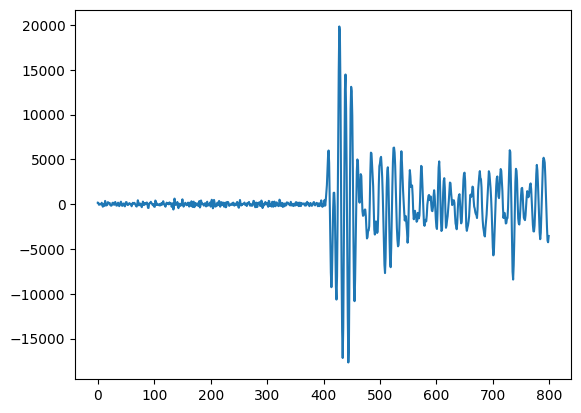

In [18]:
import matplotlib.pyplot as plt
plt.plot(D.sismogramma[a])


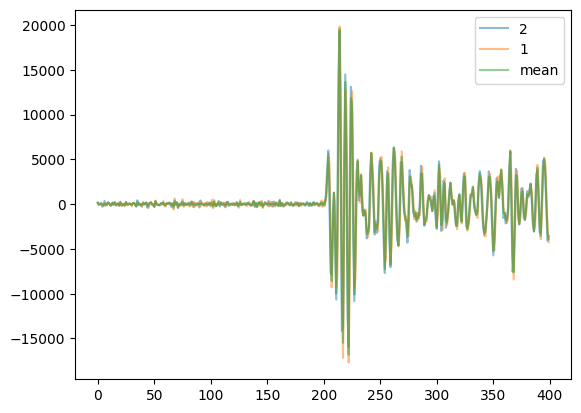

In [23]:
plt.plot(D_downsampled2.sismogramma[a], label="2", alpha=0.5)
plt.plot(D_downsampled1.sismogramma[a], label="1", alpha=0.5)
plt.plot(D_downsampledmean.sismogramma[a], label="mean", alpha=0.5)
plt.legend()

# a

In [21]:
import numpy as np
a = np.array([[i+6*j for i in range(6)] for j in range(3)])
a.shape

(3, 6)

In [23]:
a[:,::2]

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [22]:
a[:,1::2]

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])